# 1. Practicing k Means

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)
print(f'{data[0].shape=}')
data[0][:10, :]

data[0].shape=(200, 2)


array([[ -6.42884095,  10.14111739],
       [  5.86867888,   5.20110356],
       [ -0.37610937,   3.26427943],
       [  2.16679181,   9.56300522],
       [  5.0950857 ,   7.20752718],
       [-10.87888819,  -6.1131804 ],
       [  2.03405554,   9.76664755],
       [ -1.71798771,   1.4140114 ],
       [  1.16911341,   8.24556988],
       [ -1.35185444,   3.13245345]])

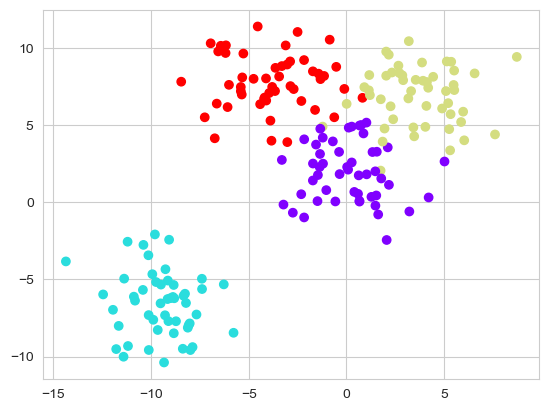

In [3]:
plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap='rainbow')

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,
                # n_init='auto'
                )
kmeans.fit(data[0])

/opt/homebrew/anaconda3/envs/glioblastoma/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [5]:
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664]])

In [6]:
kmeans.labels_

array([2, 0, 3, 0, 0, 1, 0, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 1, 2, 1, 3,
       3, 1, 2, 1, 1, 3, 0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 0, 2, 3, 1, 3, 3, 2, 0, 3, 1, 2, 3, 3, 2, 0, 1, 0, 1, 2, 0, 3,
       1, 0, 0, 1, 0, 3, 1, 3, 1, 0, 0, 3, 2, 3, 3, 1, 0, 1, 3, 3, 3, 2,
       3, 1, 1, 1, 1, 3, 3, 1, 0, 2, 1, 0, 3, 1, 3, 3, 0, 3, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 0, 2, 3, 1, 2, 2, 2,
       3, 1, 1, 2, 0, 2, 0, 3, 1, 0, 1, 2, 2, 0, 3, 1, 2, 2, 2, 2, 3, 0,
       3, 2, 0, 0, 0, 3, 0, 3, 3, 2, 1, 2, 3, 0, 2, 3, 0, 3, 2, 0, 3, 2,
       0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 0, 0, 2, 1, 3, 0, 0,
       1, 3], dtype=int32)

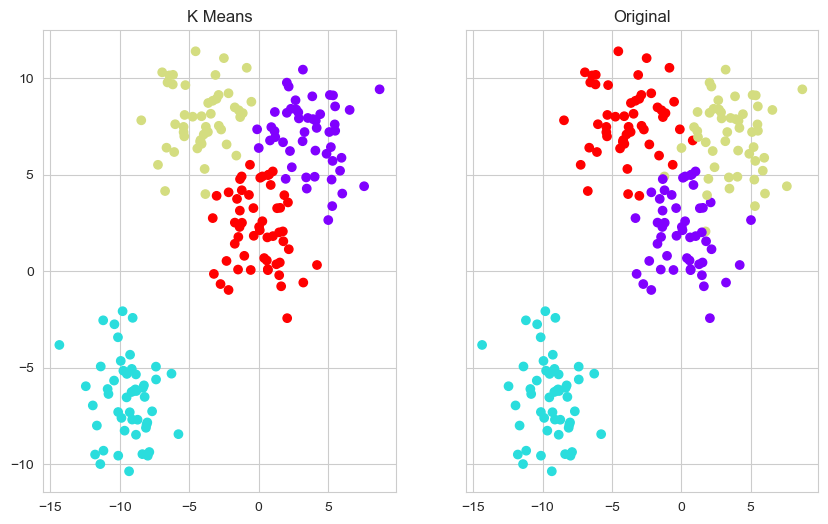

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
ax1.set_title('K Means')
ax1.scatter(data[0][:, 0], data[0][:, 1], c=kmeans.labels_, cmap='rainbow')

ax2.set_title('Original')
ax2.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap='rainbow')

# K Means with Spatial Location
The weights would be higher for the spatial location of the ROIs

In [63]:
# init
import numpy as np
from src.utils.ROI import ROI
import pandas as pd

n_frames = 10000

In [64]:
# generate signals
rois = [ROI(x, y) for x in range(4) for y in range(4)]
roi_signals = {roi: np.random.uniform(low=-50, high=50, size=n_frames) for roi in rois}
signals_df = pd.DataFrame(roi_signals)
print(f'{signals_df.shape=}')
signals_df.head()

signals_df.shape=(10000, 16)


,(0;0),(0;1),(0;2),(0;3),(1;0),(1;1),(1;2),(1;3),(2;0),(2;1),(2;2),(2;3),(3;0),(3;1),(3;2),(3;3)
0,11.264210,-13.335948,-46.972119,-2.545835,-35.906184,41.087199,24.407391,3.955644,-4.012827,5.275957,1.267345,18.012128,-9.702102,3.547005,30.768437,38.906880
1,43.556699,-35.310373,-44.996906,-40.102878,-32.521216,-2.662866,30.266848,42.279653,6.595053,8.174441,17.351568,47.763140,18.525603,-15.927309,35.362999,41.175043
2,18.770280,45.783088,-2.757450,15.550338,-9.400621,16.076158,39.845825,6.473325,-7.664064,-8.675490,37.236421,7.038710,48.945814,-43.553015,-32.239197,45.775267
3,-6.056548,23.581048,30.738813,35.650882,0.467371,-19.990760,45.579087,-24.735493,30.839270,-20.515065,24.666419,-46.863574,-32.088936,39.436950,-47.664488,-8.951859
4,-3.629064,-26.959772,31.193783,1.665720,1.130201,30.746434,41.249228,-18.124857,-31.222559,43.155361,17.192501,40.678792,-4.950094,19.067745,26.325464,-28.615501


In [65]:
# add spatial indexes
ROI.WIDTH_PIXELS = ROI.HEIGHT_PIXELS = 16

spatial_idxs = {roi: [roi.center_pixels().x, roi.center_pixels().y] for roi in rois}
spatial_idxs = pd.DataFrame(spatial_idxs, index=['x_center', 'y_center'])

# normalizing signals
max_absolute_signal_value = signals_df.abs().max().max()
normalized_signals = signals_df / max_absolute_signal_value

# concatenate signals and spatial indexes
signals_indexes = pd.concat([spatial_idxs, normalized_signals])

# we convert the index to str because KMeans doesn't accept mixed indexes
signals_indexes.index = signals_indexes.index.astype(str)

print(f'{signals_indexes.shape=}')

signals_indexes
# normalized_signals

signals_indexes.shape=(10002, 16)


,(0;0),(0;1),(0;2),(0;3),(1;0),(1;1),(1;2),(1;3),(2;0),(2;1),(2;2),(2;3),(3;0),(3;1),(3;2),(3;3)
x_center,8.000000,8.000000,8.000000,8.000000,24.000000,24.000000,24.000000,24.000000,40.000000,40.000000,40.000000,40.000000,56.000000,56.000000,56.000000,56.000000
y_center,8.000000,24.000000,40.000000,56.000000,8.000000,24.000000,40.000000,56.000000,8.000000,24.000000,40.000000,56.000000,8.000000,24.000000,40.000000,56.000000
0,0.225285,-0.266720,-0.939448,-0.050917,-0.718128,0.821749,0.488151,0.079113,-0.080257,0.105520,0.025347,0.360245,-0.194043,0.070940,0.615372,0.778142
1,0.871139,-0.706211,-0.899943,-0.802062,-0.650428,-0.053258,0.605340,0.845598,0.131902,0.163490,0.347033,0.955268,0.370514,-0.318548,0.707264,0.823505
2,0.375408,0.915667,-0.055149,0.311008,-0.188013,0.321525,0.796921,0.129467,-0.153282,-0.173511,0.744733,0.140775,0.978922,-0.871065,-0.644788,0.915510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.609218,0.889873,0.001193,-0.083260,-0.217975,0.300160,-0.408021,0.453675,-0.433401,0.416322,-0.643707,0.612280,-0.992550,0.962641,-0.159127,0.367908
9996,-0.788291,-0.156075,-0.676805,-0.283004,0.540200,0.801668,-0.401438,-0.942958,0.449900,-0.253164,0.260922,0.245971,0.186543,0.642749,0.559729,0.684491
9997,-0.186715,-0.895370,0.958305,0.613247,-0.594635,-0.764354,0.337709,0.517357,-0.848626,-0.490519,0.911400,0.979093,-0.708462,-0.619097,-0.650364,0.900317
9998,0.739960,0.298097,-0.884480,0.011356,0.929594,0.486894,0.682362,-0.683582,0.889992,0.238539,-0.608771,-0.609947,0.564731,-0.017750,0.470590,0.785971


In [66]:
# testing distances 
from scipy.spatial.distance import euclidean

roi00 = rois[0]
roi11 = rois[5]

dists = {
    'Original Signals:': euclidean(signals_df[roi00], signals_df[roi11]),
    'Normalized Signals:': euclidean(normalized_signals[roi00], normalized_signals[roi11]),
    'Spatial Distance:': euclidean(spatial_idxs[roi00], spatial_idxs[roi11]),
    'Normalized Signals with spatial indexes:': euclidean(signals_indexes[roi00], signals_indexes[roi11]),
}

for key, value in dists.items():
    print(f'{key}: {value:.2f}')

print(f'| {n_frames} |', end='')
for _, value in dists.items():
    print(f'{value:.2f}', end=' | ')


Original Signals:: 4088.13
Normalized Signals:: 81.76
Spatial Distance:: 22.63
Normalized Signals with spatial indexes:: 84.84
| 10000 |4088.13 | 81.76 | 22.63 | 84.84 | 

Distances:

| n_frames | Original Signals: | Normalized Signals: | Spatial Distance: | Normalized Signals with spatial indexes: |
|----------|-------------------|---------------------|-------------------|------------------------------------------|
| 10000    | 4088.13           | 81.76               | 22.63             | 84.84                                    |
| 1000     | 1239.32           | 24.79               | 22.63             | 33.56                                    |
| 100      | 414.84            | 8.30                | 22.63             | 24.10                                    |
| 20       | 162.93            | 3.27                | 22.62             | 22.86                                    |
| 20       | 188.51            | 3.77                | 22.63             | 22.94                                    |
| 3        | 39.95             | 0.82                | 22.63             | 22.64                                    |

-> The final distance depends heavily on the number of frames. The more frames, the more the spatial indexes will weigh. 
We don't want this. The signal distance should not be taken into account more, if there are more frames.
-> Hence, we need to weigh/normalize based on the dimensions of the image, the amplitude of the signal, and the number of frames (time steps).

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init='auto')
# IMPORTANT: signals_df needs to be transposed here because a format of (n_samples, n_features) is expected
# n_samples is the number of ROIs and n_features is the number of frames + the 2 spatial indexes
kmeans.fit(signals_indexes.T)

KMeans(n_clusters=4, n_init='auto')

In [20]:
kmeans.labels_

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2, 3, 3, 2, 2], dtype=int32)

In [67]:
roi_cluster_dict = dict(zip(rois, kmeans.labels_))

# 3. Weighted K Means

We need to weigh/normalize based on the dimensions of the image, the amplitude of the signal, and the number of frames (time steps).

We want to introduce a factor that lets us weigh the spatial indexes more than the signals.


In [28]:
from collections import namedtuple
# init
import numpy as np
from src.utils.ROI import ROI
import pandas as pd

Dimensions = namedtuple('Dimensions', ['width', 'height'])

In [35]:
# Vars
n_frames = 4
ROI.N_VERTICAL = ROI.N_HORIZONTAL = 4
ROI.HEIGHT_PIXELS = ROI.WIDTH_PIXELS = 32
img_dims = Dimensions(ROI.WIDTH_PIXELS * ROI.N_HORIZONTAL, ROI.HEIGHT_PIXELS * ROI.N_VERTICAL)
print(f'{img_dims=}')

img_dims=Dimensions(width=128, height=128)


In [36]:
# generate signals
rois = [ROI(x, y) for x in range(4) for y in range(4)]
signals_df = pd.DataFrame({roi: np.random.uniform(low=-50, high=50, size=n_frames) for roi in rois})
print(f'{signals_df.shape=}')
# signals_df.head()

signals_df.shape=(4, 16)


In [38]:
# generate indexes
spatial_indexes = pd.DataFrame({roi: [roi.center_pixels().x, roi.center_pixels().y] for roi in rois}, index=['x_center', 'y_center'])
spatial_indexes

,(0;0),(0;1),(0;2),(0;3),(1;0),(1;1),(1;2),(1;3),(2;0),(2;1),(2;2),(2;3),(3;0),(3;1),(3;2),(3;3)
x_center,16,16,16,16,48,48,48,48,80,80,80,80,112,112,112,112
y_center,16,48,80,112,16,48,80,112,16,48,80,112,16,48,80,112


In [39]:
# normalize signals based on the spatial to signal ratio (how much the spatial indexes should weigh)
spatial_weight = 0.2
signals_df

,(0;0),(0;1),(0;2),(0;3),(1;0),(1;1),(1;2),(1;3),(2;0),(2;1),(2;2),(2;3),(3;0),(3;1),(3;2),(3;3)
0,40.031048,-43.202763,47.156875,-42.341545,36.697920,2.455516,-10.053018,12.996309,-20.492865,-34.547070,9.229568,-43.636492,5.330990,-17.686416,-41.437188,47.809531
1,25.060079,-31.298824,-44.286941,-44.440890,-1.883568,-49.093986,-14.408827,-30.768486,-33.560396,-14.978082,34.820417,5.312554,-22.537073,-37.338296,3.598642,47.177358
2,-20.650480,-7.529982,35.486194,-27.768877,10.910134,41.525497,40.716295,9.585631,-27.687191,-38.005322,5.156256,-16.195851,-24.637839,34.148464,18.189913,4.681270
3,6.306094,-10.201953,-20.284588,-20.115924,-28.426083,40.771499,0.484422,-6.956765,-20.831671,-21.275088,-5.786307,16.312074,34.838036,17.382716,11.607203,-15.648970
